# Etude de l'impact environnemental de l'IA générative 

## Objectifs 

Dans ce projet on souhaite étudier la dépense en énergie et le cout carbone associé des différents modèles utilisés pour générer du texte, qu'on appelle des Large Language Models (LLM). Les objectifs du projet sont :

- comprendre comment fonctionnent les IA générative de ChatGPT ;
- comparer les différents modèles et les coûts associés ;
- quantifier les impacts de l'IA générative sur l'environnement.

## Pour comprendre le fonctionnement d'un LLM

On commencera par lire cet article qui explique la génération d'un texte par une IA :
https://www.jeunesfrancophonesetlascience.fr/_files/ugd/38f5f0_e37a8559a50b428292d084834cfdd990.pdf
## Sources

Les données proviennent du projet Ecologits qui s'intéresse à l'impact environnemental de l'IA. Toute la méthodologie est détaillée sur leur site : https://ecologits.ai/latest/

Quelques points importants sur la base de données : 

- pour un type de modèle, on a l'énergie moyenne consommée en Wattheure (Wh) pour générer 1 Token, puis un Tweet, un email, un résumé d'article, une petite conversation et un rapport de 5 pages ;
- cette énergie peut ensuite être convertie en coût environnemental selon le pays, car la production d'énergie est très dépendante de la source de production (nucléaire, éolienne etc). Le tableau electricity_mix.csv contient la conversion par pays d'1Wh en gramme de CO2 émis (pwh), en énergie primaire (pe) et en ressources abiotiques (minéraux et métaux, adpe);
- pour chaque modèle, on différencie le nombre de paramètres total du modèle du nombre de paramètres actifs. Par exemple si un modèle peut générer du texte, des images et du son, quand on génère seulement du texte, il y aura une partie des paramètres qui seront réellement utilisés, et ce sont ceux qu'on appelle les paramètres actifs. Dans le tableau de données, le nombre de paramètres est en milliards.



## Première partie : Comparaison des différents modèles.

Dans cette partie on étudiera la dépense énergétique d'une petite conversation avec différents modèles. 
On mettra en avant les différences entre les LLM (nombre total de paramètres, nombre de paramètres actifs,... ) et la différence de dépense énergétique associée. 

Commençons par charger la base de données. Quelques pistes pour commencer l'étude : 
- comparer l'énergie dépensée en fonction du type de texte ;
- afficher les dépenses d'énergie en fonction de chaque modèle pour un même type de texte ;
- étudier le lien entre nombre de paramètres et l'énergie dépensée.

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

cons_ia = pd.read_csv('gen_AI_energy.csv', sep=',')
cons_ia.head()

,Provider,Model,Active parameters,Total parameters,Token,Tweet,Email,Resume,Petite_conv,Cinq_pages
0,OpenAI,gpt 4o,137,440,0.087500,4.37500,14.87500,21.87500,35.00,437.500
1,OpenAI,Gpt 3.5,45,45,0.008950,0.44750,1.52150,2.23750,3.58,44.750
2,OpenAI,gpt 4,550,1760,1.117500,55.87500,189.97500,279.37500,447.00,5587.500
3,OpenAI,gpt 4 turbo,275,880,0.287500,14.37500,48.87500,71.87500,115.00,1437.500
4,OpenAI,gpt 4o mini,18,18,0.005175,0.25875,0.87975,1.29375,2.07,25.875


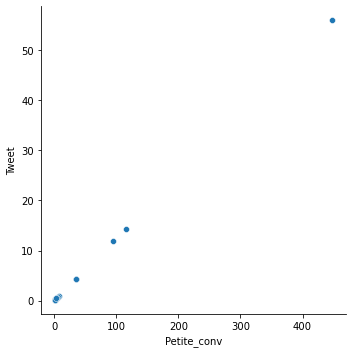

In [19]:
import seaborn as sns
cons_ia[["Token"]].mean()
sns.relplot(y='Tweet', x='Petite_conv',  data=cons_ia)

In [ ]:
## Etude du coût carbone et comparaison entre les pays

On importe maintenant une nouvelle base de données : \t|electricity_mixes.csv|. Dans cette base de données, on a notamment le coût carbone  d'1Wh en fonction du pays. 

Objectifs de la section : 
    
    - Faire une fonction qui prend en entrée le nom du modèle, le pays et le type de conversation, puis qui renvoie le coût en carbone ;
    
    - Etudier le cout carbone d'une petite conversation en fonction du pays et le représenter sur une carte du monde.

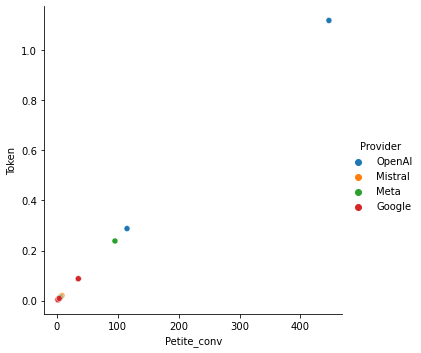

In [13]:
sns.relplot(y='Token', x='Petite_conv', hue='Provider',  data=cons_ia)


In [21]:
cout_pays = pd.read_csv('electricity_mixes.csv', sep=',')
cout_pays.head()

,name,adpe,pe,gwp
0,WOR,7.377080e-08,9.988000,0.590478
1,EEE,6.423170e-08,12.873000,0.509427
2,ZWE,1.095020e-07,7.754880,0.823938
3,ZMB,1.621930e-07,0.089918,0.014026
4,ZAF,8.624450e-08,11.357000,1.149150


In [22]:
from math import pi
# number of variable
cat=['abiotic', 'primary', 'co2']


## on selectionne un sous echantillon de pays : 
choix_pays = [ 'CHN','FRA',"DEU","CHE","USA"]
mx= cout_pays[["adpe","pe","gwp"]].max().max()
mx

23.3003

In [25]:
cout_chatgpt = cons_ia.loc[cons_ia["Model"]=="gpt 4o"]["Token"][0]
cout_chatgpt
cout_pays["cout_co2"] = cout_pays["gwp"]*cout_chatgpt
cout_pays["cout_abiotic"] = cout_pays["adpe"]*cout_chatgpt
cout_pays["cout_ep"] = cout_pays["pe"]*cout_chatgpt
cout_pays["prop_co2"] = cout_pays["cout_co2"]/cout_pays["cout_co2"].max()
cout_pays["prop_abiotic"] = cout_pays["cout_abiotic"]/cout_pays["cout_abiotic"].max()
cout_pays["prop_ep"] = cout_pays["cout_ep"]/cout_pays["cout_ep"].max()
cout_pays.head()


,name,adpe,pe,gwp,cout_co2,cout_abiotic,cout_ep,prop_co2,prop_abiotic,prop_ep
0,WOR,7.377080e-08,9.988000,0.590478,0.051667,6.454945e-09,0.873950,0.284175,0.277778,0.428664
1,EEE,6.423170e-08,12.873000,0.509427,0.044575,5.620274e-09,1.126387,0.245168,0.241859,0.552482
2,ZWE,1.095020e-07,7.754880,0.823938,0.072095,9.581425e-09,0.678552,0.396530,0.412320,0.332823
3,ZMB,1.621930e-07,0.089918,0.014026,0.001227,1.419189e-08,0.007868,0.006750,0.610724,0.003859
4,ZAF,8.624450e-08,11.357000,1.149150,0.100551,7.546394e-09,0.993737,0.553042,0.324746,0.487419


In [26]:

def spyder(choix_pays, categories = cat, scale ="full"): 
    N = len(categories)
    pays_sel = cout_pays.loc[cout_pays['name'].isin(choix_pays)].reset_index()[["name","prop_abiotic","prop_ep","prop_co2"]]

    # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]
 
    # Initialise the spider plot
    ax = plt.subplot(111, polar=True)
 
    # If you want the first axis to be on top:
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)
 
    # Draw one axe per variable + add labels
    plt.xticks(angles[:-1], categories)
 
    # Draw ylabels
    ax.set_rlabel_position(0)
    if scale=="full":  # Even numbers
        plt.yticks([0,0.50,1], ["0","0.5","1"], color="grey", size=7)
        plt.ylim(0,1)
    else:
        mx= pays_sel[["prop_abiotic","prop_ep","prop_co2"]].max().max()
        print(mx)
        plt.yticks([0,mx/2,mx], ["0",round(mx/2,2),round(mx,2)], color="grey", size=7)
        plt.ylim(0,mx)

    # ------- PART 2: Add plots
    pays = pays_sel["name"]
    # Plot each individual = each line of the data
    # I don't make a loop, because plotting more than 3 groups makes the chart unreadable
    for i in range(0,len(choix_pays)): 
        values=pays_sel.loc[i].drop(['name']).values.flatten().tolist()
        values += values[:1]
        ax.plot(angles, values, linewidth=1, linestyle='solid', label=pays[i])
        ax.fill(angles, values, 'b', alpha=0.1)
 
    
    # Add legend
    plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

    # Show the graph
    plt.show()


0.49895806763657014


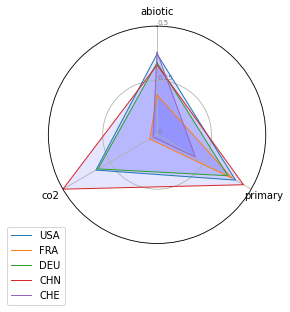

In [27]:
spyder(choix_pays, scale ="proportion")